Task

* Business Understanding
* Data understanding
* Exploratory data Analysis
* Data Preparation
* Model Building ( Logistic Regression, ensemble, Boosting etc)
* Model Selection
* Performance reporting
* Deploy the model
* Converting ML metrics into Business metric and explaining result to business
* Prepare presentation for non technical persons.

* Data Set Information :

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv',sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

C:\Users\babla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customer Responce on policy')

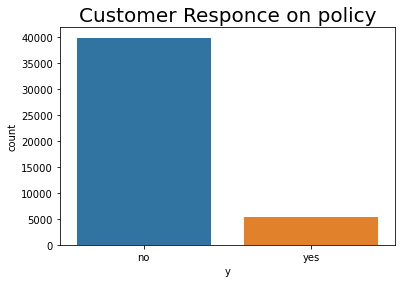

In [8]:
sns.countplot(df["y"])
plt.title("Customer Responce on policy",fontsize=20)

Text(0.5, 1.0, 'Age vs Subscription')

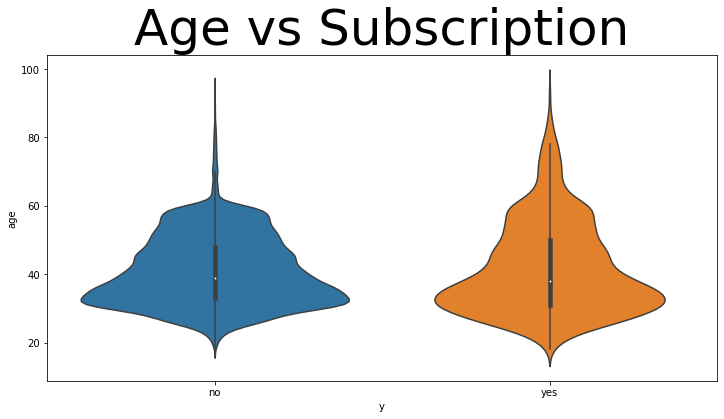

In [6]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="y",y="age",data=df)
plt.title("Age vs Subscription", fontsize=50)

Text(0.5, 1.0, 'Age vs Subscription')

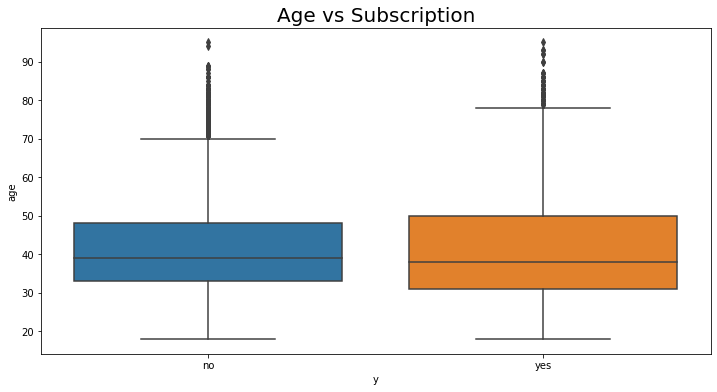

In [12]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x="y",y="age",data=df)
plt.title("Age vs Subscription", fontsize=20)

### Clients who buy the policy are more likely to fall between the age of 20-40 there are more number of clients beyond age of 60 who have bought the policy and median for no policy is higher.

Text(0.5, 1.0, 'Marital Status vs Subscription')

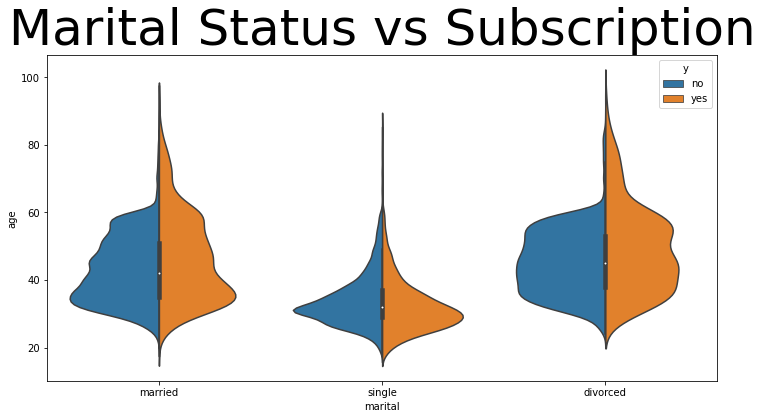

In [18]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="marital",y = 'age',hue = 'y',data=df,split = True)
plt.title("Marital Status vs Subscription", fontsize=50)

Text(0.5, 1.0, 'Job vs Subscription according to Age')

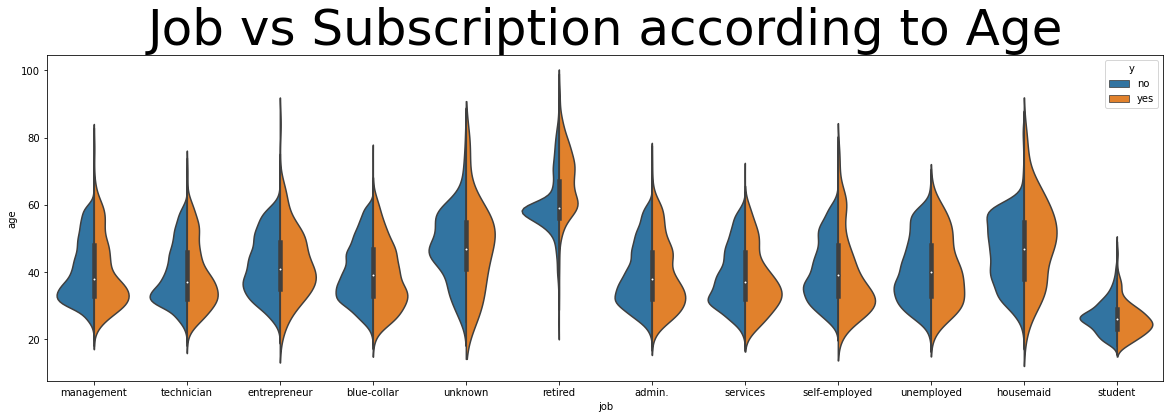

In [39]:
fig = plt.figure(figsize=(20,6))
sns.violinplot(x="job",y = 'age',hue = 'y',data=df,split = True)
plt.title("Job vs Subscription according to Age", fontsize=50)

Text(0.5, 1.0, 'Defaulters vs Subscription')

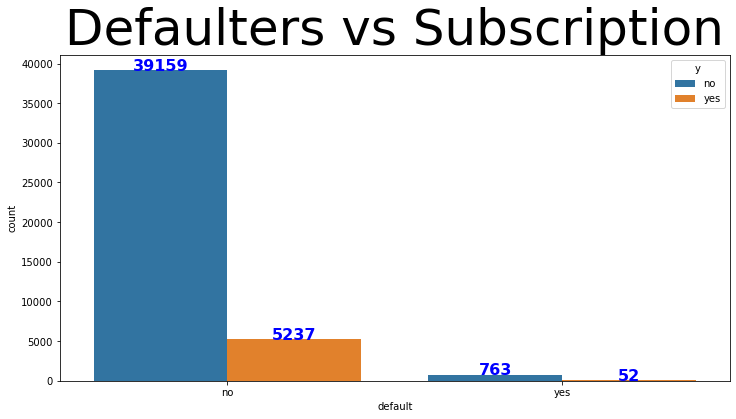

In [20]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'default',hue = 'y',data = df)

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Defaulters vs Subscription',fontsize = 50)


### Clients who do have default as their status are less likely to buy the policy

Text(0.5, 1.0, 'Housing vs Subscription')

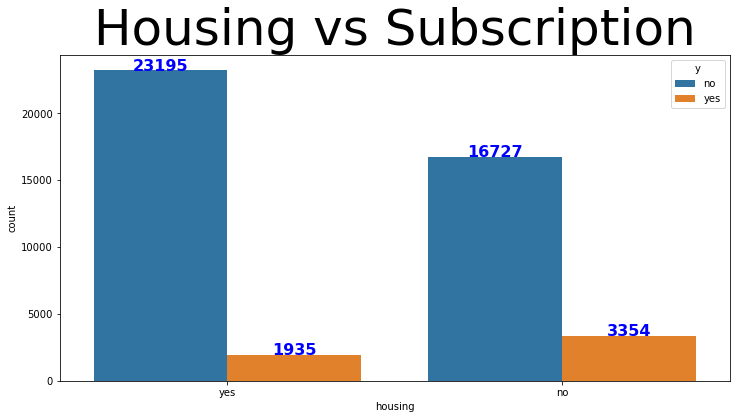

In [21]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'housing',hue = 'y',data = df)

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Housing vs Subscription',fontsize = 50)

### Irrespective of their housing loan status there is a small diffrence(26%) between clients who have and not have housing loan and yet apply for the policy.

Text(0.5, 1.0, 'Personal Loan vs Subscription')

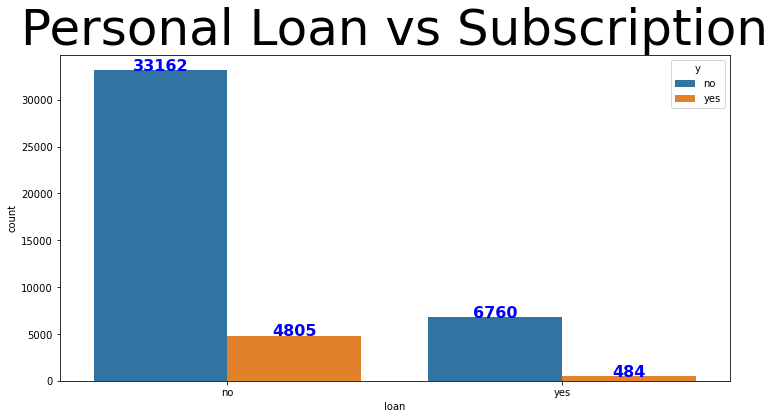

In [22]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'loan',hue = 'y',data = df)

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Personal Loan vs Subscription',fontsize = 50)

Text(0.5, 1.0, 'Job Type vs Subscription')

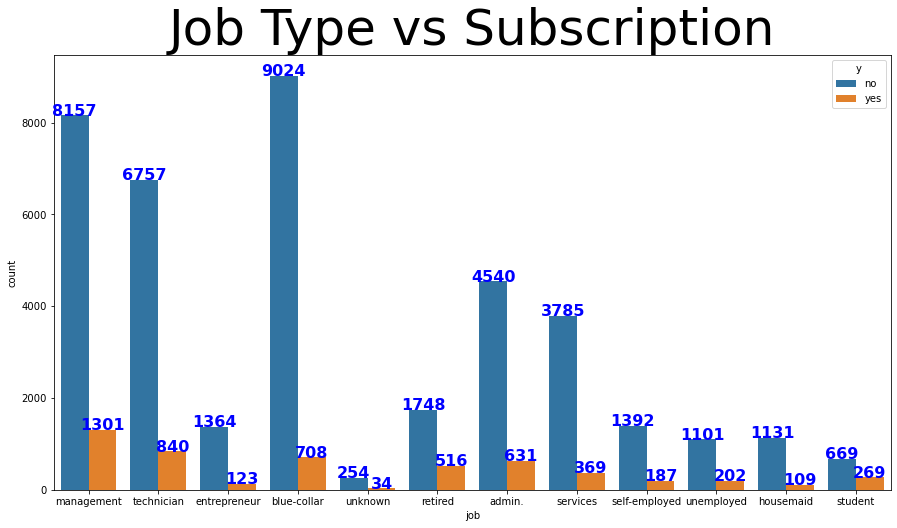

In [23]:
fig = plt.figure(figsize = (15,8))
b = sns.countplot(x = 'job',hue = 'y',data = df)

b.set_xticklabels(b.get_xticklabels(),rotation=0)
for p in b.patches:
    height = p.get_height()
    b.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)

b.set_title('Job Type vs Subscription',fontsize =50)

### Clients who have their job description as management are more likely to opt for the policy and with unknown least.

Text(0.5, 1.0, 'Duration')

<Figure size 2160x1080 with 0 Axes>

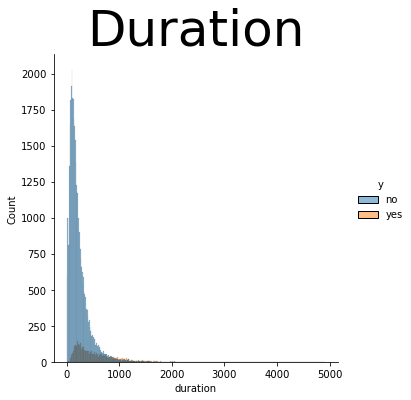

In [31]:
fig = plt.figure(figsize=(30,15))
sns.displot(x=df["duration"],hue=df["y"])
plt.title("Duration", fontsize=50)

In [32]:
mean_y = df[df['y'] == 'yes']['duration'].median()
mean_n = df[df['y'] == 'no']['duration'].median()

print(' Mean Duration where clients opt for policy:',mean_y,'\n','Mean Duration where clients do not opt for policy:',mean_n)

 Mean Duration where clients opt for policy: 426.0 
 Mean Duration where clients do not opt for policy: 164.0


Text(0.5, 1.0, 'Number of Contacts Performed before this Campaign and Subscription')

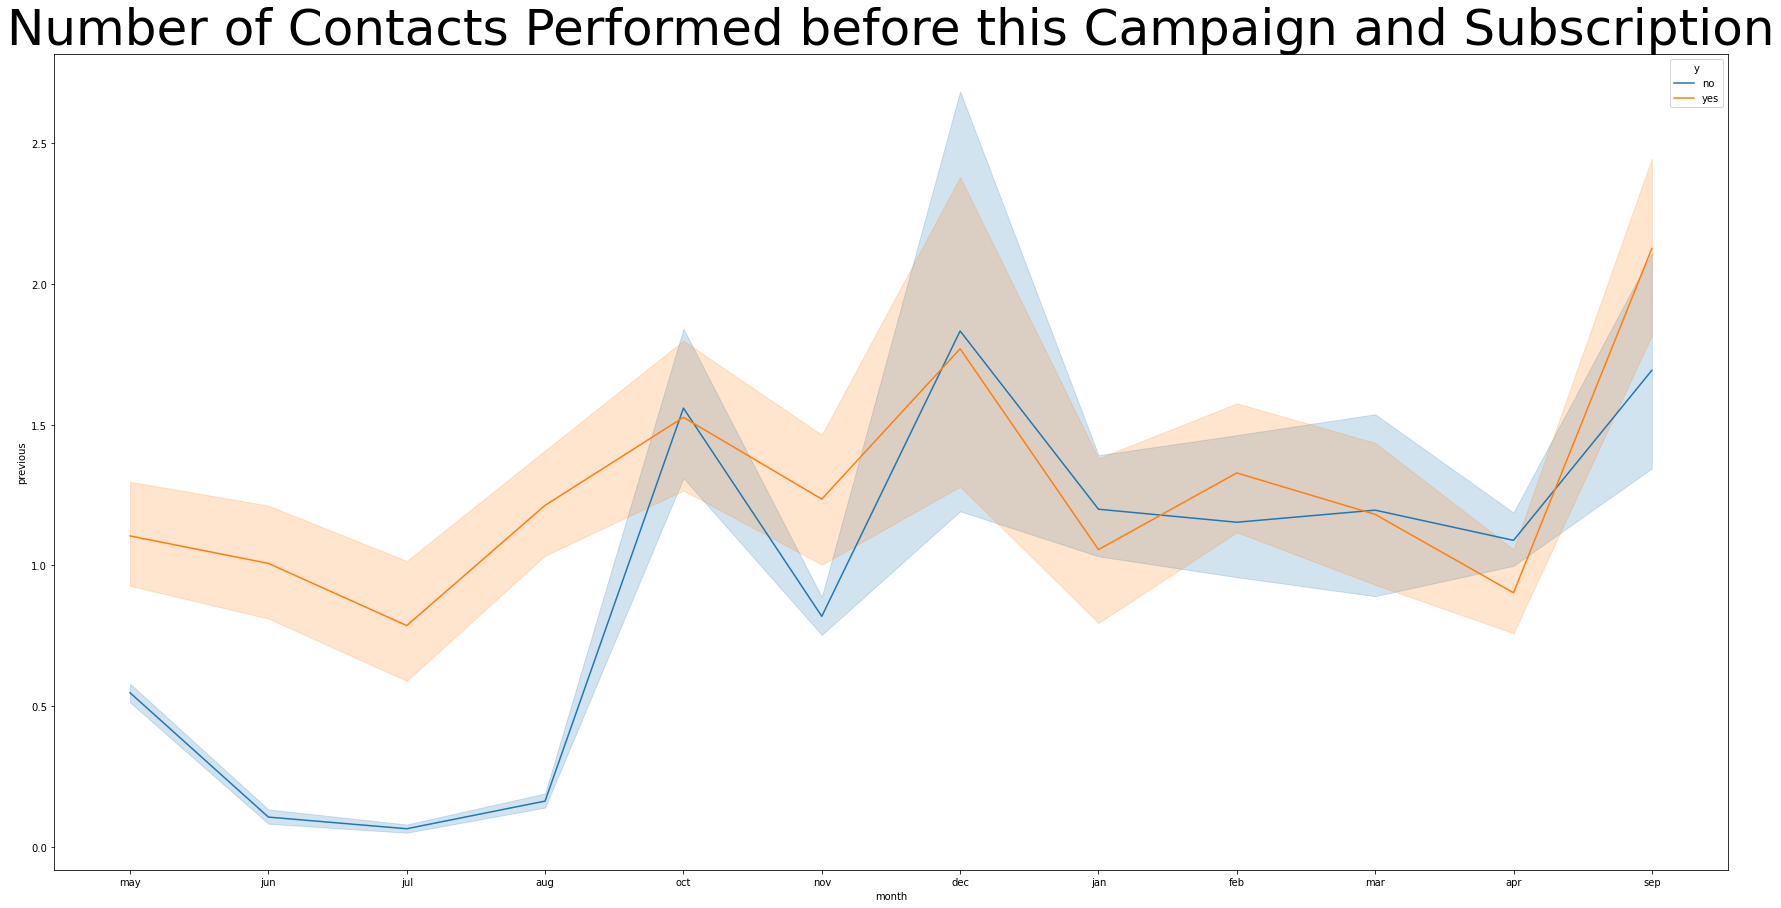

In [35]:
plt.figure(figsize = (30,15))
sns.lineplot(data = df, x = 'month',y = 'previous',hue = 'y')
plt.title('Number of Contacts Performed before this Campaign and Subscription',fontsize = 50)

Text(0.5, 1.0, 'Number of Contacts Performed before during the Campaign and Subscription')

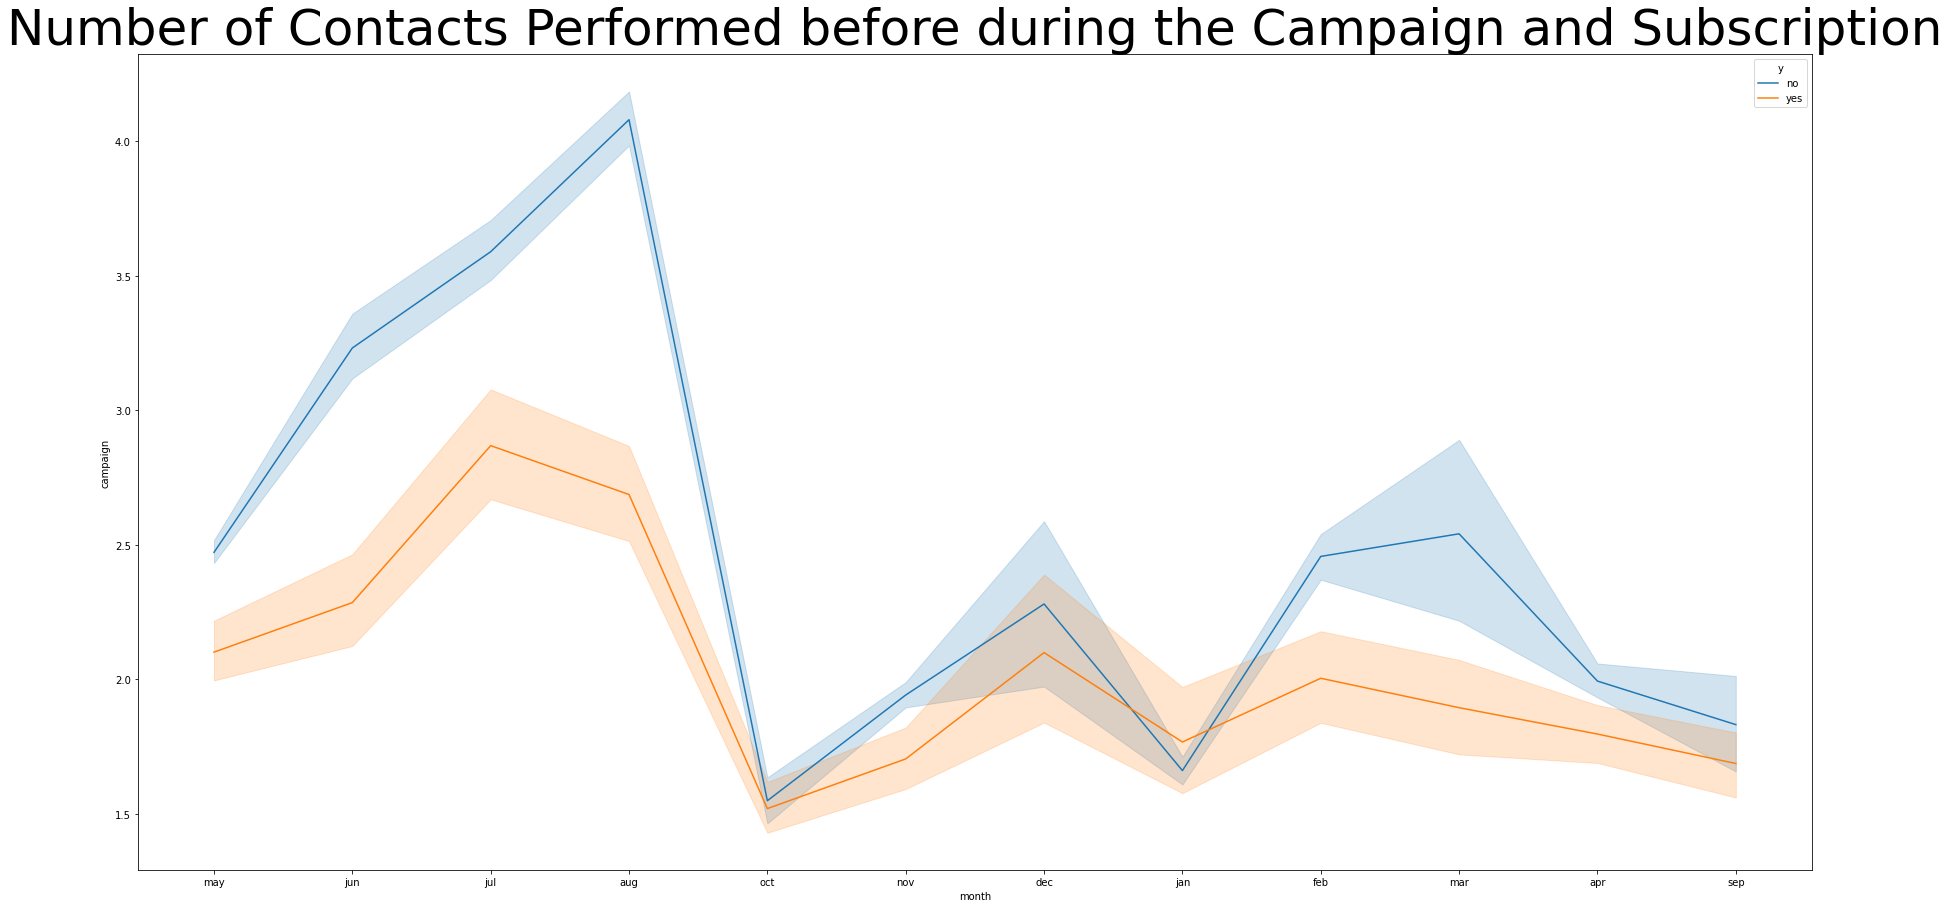

In [38]:
plt.figure(figsize = (30,15))
sns.lineplot(data = df, x = 'month',y = 'campaign',hue = 'y')
plt.title('Number of Contacts Performed before during the Campaign and Subscription',fontsize = 50)

#### 1.Clients who buy the policy are more likely to fall between the age of 20-40 there are more number of clients beyond age of 60 who have bought the policy and median for no policy is higher.Retired clients are more likely to buy the policy.
#### 2.Clients who do have default as their status are less likely to buy the policy.
#### 3.Irrespective of the housing loan status there is a small difference(26%) between clients who have and not have housing loan and yet apply for the policy.
#### 4Clients with secondary and tertiary education are more likely to opt for the policy.

#### 5.On average the call lasts for 426 seconds for the clients who opted for the policy and for clients who did not opt for policy the call lasted for 164 seconds which is lesser than clients who opt for policy. Thus clients spend more time on communication when they opt for the policy.
#### 6.Clients are more likely to opt for policy from the month of May to October also in the month of September. Thus contact before the campaign brings more clients to opt for the policy.